In [1]:
import numpy as np
import json

In [2]:
json_str = '{"conv_stride" : [1, 1]}'

In [3]:
d = json.loads(json_str)

In [4]:
np.zeros(d["conv_stride"])

array([[0.]])

In [5]:
d

{'conv_stride': [1, 1]}

In [6]:
vals = np.array([1, 3, 2, 10, 1, 2, 1, 1, 2, 8, 10, 9, 9, 8, 10, 1, 1, 2, 1, 2, 1, 1, 2, 10, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 5])
vals.shape

(36,)

In [7]:
times = np.array([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 8.0])
times.shape

(36,)

In [8]:
import matplotlib.pyplot as plt

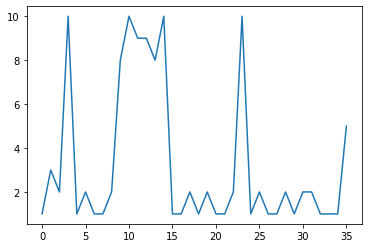

In [9]:
plt.plot(vals)

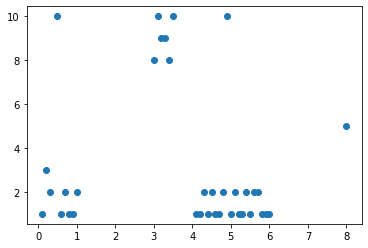

In [10]:
plt.scatter(times, vals)

In [11]:
ema = np.nan
a = 0.8
results = []
for v in vals:
    if np.isnan(ema):
        ema = v
    else:
        ema = a*v + (1-a)*ema
    results.append(ema)

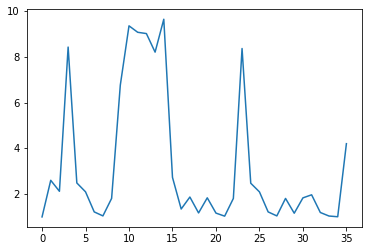

In [12]:
plt.plot(results)

In [13]:
avg = np.nan
n = 0
results_avg = []
for v in vals:
    if np.isnan(avg):
        avg = v
        n += 1
    else:
        avg = (avg * n + v) / (n+1)
        n += 1
    results_avg.append(avg)

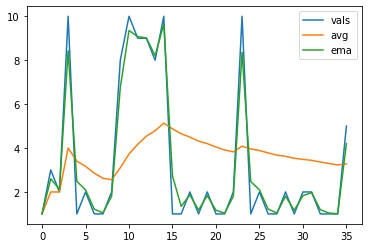

In [14]:
plt.plot(vals, label="vals")
plt.plot(results_avg, label="avg")
plt.plot(results, label="ema")
plt.legend()

In [15]:
ema = np.nan
avg = np.nan
emav = np.nan
n = 0
a = 0.4
at = 0.6
av = 0
ema_l = []
ema_vl = []
avg_l = []
val_l = []
time_l = []
v = vals[0]
last_t = 0
for t in np.arange(times[0], times[-1] + 0.2, 0.1):
    if np.any(np.isclose(t, times)):
        idx = np.abs(times - t).argmin()
        v = vals[idx]
        av = 1 - np.exp(-t + last_t)
        #print("av: {}, last_t: {}, t: {}, a:{}".format(av, last_t, t, a))
        last_t = av*t + (1-av)*last_t
        #print("idx: {}, v: {}, t: {}".format(idx, v, t))
        if np.isnan(ema): 
            ema = vals[0]
            avg = vals[0]
            emav = vals[0]
            n += 1
        else:
            avg = (avg * n + vals[idx]) / (n + 1)
            ema = a*vals[idx] + (1-a)*ema
            emav = av*vals[idx] + (1-av)*emav
            n += 1
    time_l.append(t)
    ema_l.append(ema)
    avg_l.append(avg)
    val_l.append(v)
    ema_vl.append(emav)

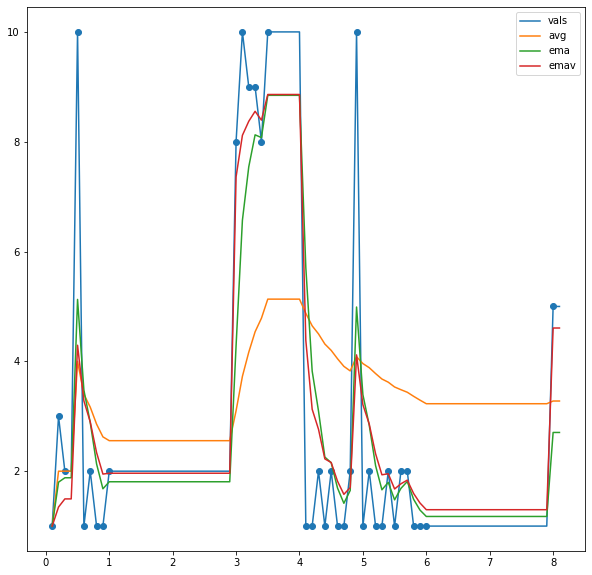

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(time_l, val_l, label="vals")
plt.plot(time_l, avg_l, label="avg")
plt.plot(time_l, ema_l, label="ema")
plt.plot(time_l, ema_vl, label="emav")
plt.scatter(times, vals)
plt.legend()

In [167]:
events = np.loadtxt("C:/Users/schiavaz/lava-nc/depth/data/esim_data/curvy_small/events.txt")

In [168]:
#events = events[events[:, 3] == 1]

In [169]:
sub_factor = 1
refract_period = 0.1
shape = (45, 60)

In [170]:
from gtd2d.data_loader import filter

In [171]:
events, shape = filter.filter_conv(events, shape, factor=sub_factor)

In [172]:
time_range=[2.0, 2.2]

In [173]:
events = filter.filter_refract(events, refract_period)
events = filter.filter_time(events, time_range[0], time_range[1])

In [174]:
from events_utils import visualize as vis

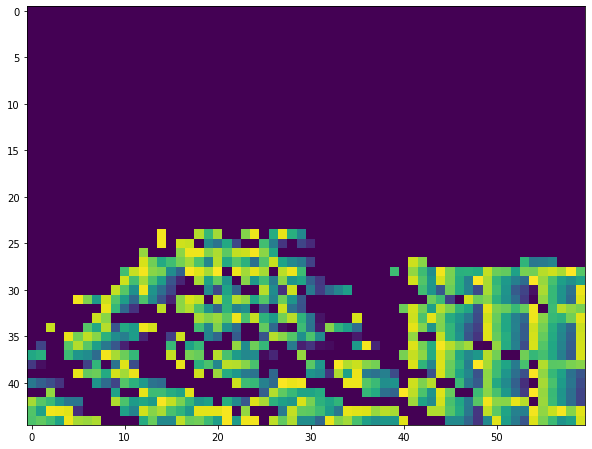

In [175]:
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events, shape, filter_polarity=False)
plt.imshow(img, interpolation="none")

In [195]:
test = np.array(1)
print(test)
test = test.astype(np.uint8)
print(test)

1
1


In [196]:
test += 100
print(test)

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('int32') to dtype('uint8') with casting rule 'same_kind'

In [2]:
t = np.array([1, 2, 3])
t.shape

(3,)

In [5]:
y = np.expand_dims(t, axis=(0, -1))
y.shape

(1, 3, 1)

In [63]:
test = np.array([
    [1, 2, 3],
    [4, 5, 6], 
    [7, 8, 9]
])

In [64]:
test1 = np.copy(test)

In [68]:
test = np.stack((test, test1))

ValueError: all input arrays must have the same shape

In [66]:
test

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [67]:
test.shape

(2, 3, 3)

In [51]:
l = np.array([])

In [52]:
np.append(l, test, axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)